## 支撑向量机 SVM

In [1]:
# 使用SVM既可以解决分类又可以解决回归问题

In [3]:
# SVM对未来的泛化能力尽可能好这种考量，没有寄希望于数据的预处理阶段，或者是找到模型之后，再对这个模型进行正则化这种方式
# 而是将这个对泛化能力的考量直接放在了算法内部，也就是要找到一个决策边界，这个决策边界离我们的分类样本都要尽可能的远。我们直观的看，这样的分类边界他的泛化能力相对是比较好的
# 在数学上是可以严格证明出，在一个不适定的问题中，使用SVM这样的方式找到一个这样的决策边界，他的泛化能力相对是比较好的。
# 也是一种非常重要的统计方法，背后有许多统计理论的支撑的

In [4]:
# SVM尝试寻找一个最优的决策边界，距离两个类别的最近的样本最远
# 支撑向量定义了一个区域，而最终最优的决策边界是被这个区域所定义的，是位于这个区域中间最中间的一根线；换句话说，我们最终找到的那根最优的决策边界是由我们的支撑向量定义的
# 支撑向量是SVM算法里非常重要的元素

In [ ]:
# SVM需要最大化margin，解决的是线性可分的问题。实际问题通常是线性不可分的，通过改进也是可以适用的

## Soft Margin和SVM的正则化

In [12]:
# 所谓的正则化，其本质其实是一个概念，并不是对所有的模型我们添加的正则画像都是同样的我们在逻辑回归中介绍的l1范式与l2范式
# 有一些模型来说，我们要改变正则化的策略，但是我们对其正则化的效果是一样的

In [13]:
# 两种情况：泛化能力， 预测结果比一个正确的将所有的训练数据集都进行正确分类所产生的边界还要好。
# 接上，线性不可分的情况，已经不是泛化能力强不强的问题了，而是根本无法应用，无法得到结果这样的问题
# 所以，必须思考一个机制，SVM边界应该有一定的容错能力

In [14]:
# C越大，相应地容错空间越小，如果C正无穷，那么就逼迫￥(i)的值为0，此时soft margin 变成了hard margin
# 这里仅仅讲了线性的，没有讲非线性的

## scikit-learn中的SVM

In [15]:
# 使用之前要对数据进行标准化处理（类似于kNN）
# 接上，道理很简单，假如横坐标为0与1之间，纵坐标为0到100000之间，这样决策边界就是一条近似于平行于横轴的一条直线， 因为纵坐标的值较大，很小的距离实际距离都很大
# 如果我们的特征在不同的维度上他们的数据尺度不同的话，就会非常严重地影响我们地SVM最终得到的结果（决策边界）

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

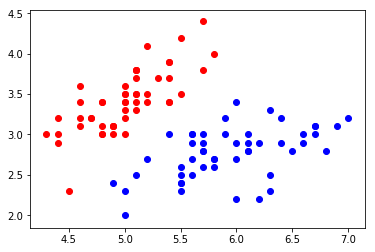

In [21]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [25]:
# 线性SVM
from sklearn.svm import LinearSVC  # support vector classifier就是使用支撑向量机的思想来进行分类工作

svc = LinearSVC(C=1e9)  # C取值越大，就越倾向于一个hard svm, 取值越小，就越表示是将其容错能力更小些
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

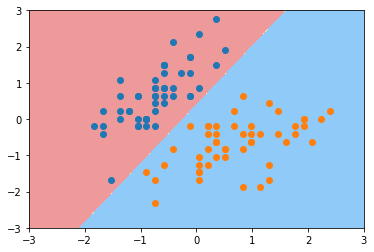

In [28]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.scatter(X_standard[y==2, 0], X_standard[y==2, 1])
plt.show()

In [29]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

# 注意参数multi_class='ovr'，也可以尝试ovc。
# 注意参数penalty='l2'，也可以尝试l1。

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

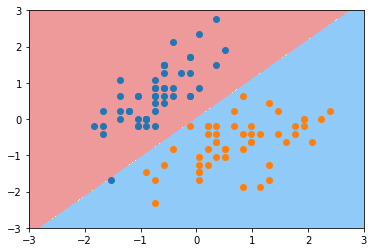

In [30]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.scatter(X_standard[y==2, 0], X_standard[y==2, 1])
plt.show()

In [31]:
svc.coef_

# 结果是二维数组，其实sklearn中为我们封装的svm算法可以直接解决多分类问题

array([[ 4.032426  , -2.49295574]])

In [32]:
svc.intercept_

array([0.95368372])

In [33]:
# 由了coef_和interceptio_这两个参数相应就可以绘制出margin对应的两条线

In [34]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 
    # 绘制margin对应的上下两条线
    w = model.coef_[0]  # 成员变量是一个二维数组
    b = model.intercept_[0]
    # w0 * x0 + w1 * x1 + b = 0
    # 改写下：x1 = -w0 / w1 * x0 - b / w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/ w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1]*plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <=axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='b')
    plt.plot(plot_x[down_index], down_y[down_index], color='b')

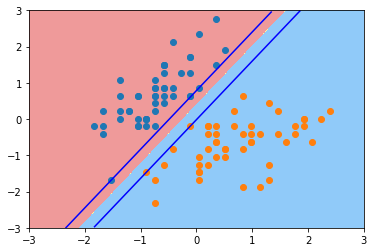

In [37]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.scatter(X_standard[y==2, 0], X_standard[y==2, 1])
plt.show()

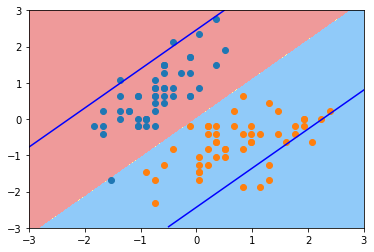

In [38]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.scatter(X_standard[y==2, 0], X_standard[y==2, 1])
plt.show()

In [39]:
# 至此为止，我们的分类方式都是线性分类的方式，但是对于高度非线性的数据集，我们
# 接上：将使用老套路多项式特征来处理非线性的问题，再引入另一个话题（核函数）

## 核函数

In [1]:
# 一种数学技巧，免去了先进行变形，再对变形后的结果进行点乘这样的运算步骤，
# 尤其对一些复杂的变形，通常使用核函数的话一方面计算量会减少，另一方面节省了存储空间，因为我们对原来的样本进行变形，通常把低维变成更加高维的数据，存储高维数据就会耗费巨大的空间
# 核函数不是SVM独有的（只不过在这里用得比较多），核函数技巧可以运用与其他算法
# 多项式核函数本质是将我们所有的数据点首先添加多项式项，再将这些有了多项式项新的数据特征进行点乘，就形成了多项式核函数

## 高斯核函数 Radial Basis Function Kernel（RBF核）

In [2]:
# 本质也应该是将原来的数据点先映射成新的特征向量，然后是新的特征向量点乘的结果
# 也可以理解为：将每一个样本点映射到一个无穷维的特征空间。。。
# 结果很简单，推到倒是很复杂

In [3]:
# 多项式特征：依靠升维使得原本线性不可分的数据线性可分
# 高斯核其实也是做的这样的一件事

### 直观理解高斯核函数

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.arange(-4, 5, 1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [14]:
y = np.array((x>=-2) & (x<=2), dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

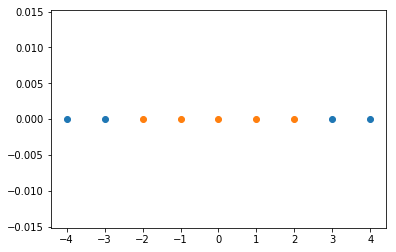

In [16]:
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

In [26]:
def gaussian(x, l): # x表示一个数据点，l表示一个地标
    gamma = 1.0
    return np.exp(-gamma * (x - l) ** 2) # 因为x和l都是一维的数据，所以他们俩都是一个数，不需要考虑模的问题

In [27]:
l1, l2 = -1, 1 # 固定两个地标，相应的对于原来的x这样的一维数组来说，就可以通过高斯函数每一个数字和l1和l2计算一下，得到一个新的二维的样本点

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)

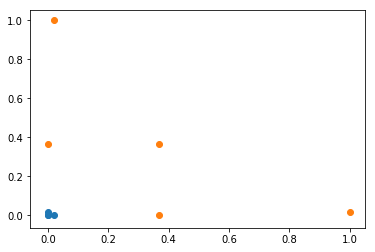

In [29]:
plt.scatter(X_new[y==0, 0], X_new[y==0, 1])
plt.scatter(X_new[y==1, 0], X_new[y==1, 1])
plt.show()

# 可见二维的数据是线性可分的

## scikit-learn中的高斯核函数

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

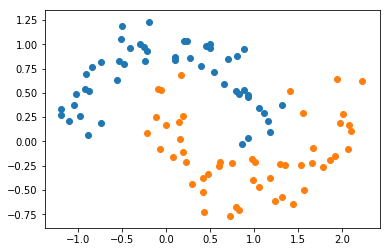

In [37]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', gamma=gamma))
    ])

In [39]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [45]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

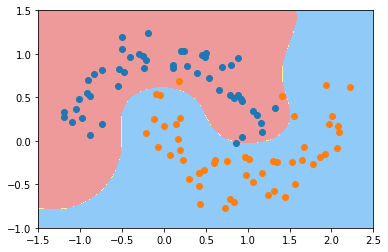

In [47]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# gamma的值为1.0的情况下

In [50]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

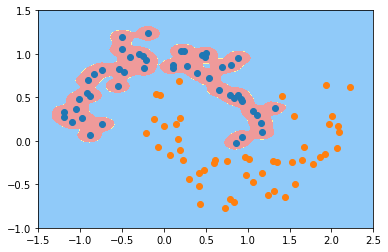

In [51]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 过拟合了

In [54]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

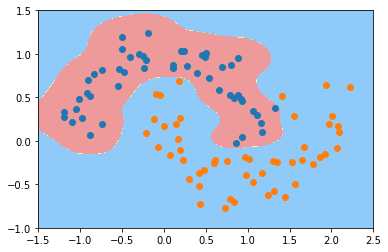

In [55]:
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [56]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

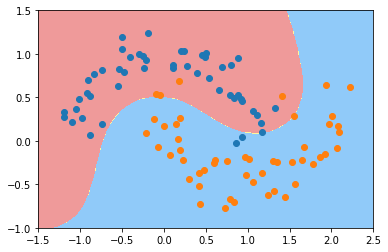

In [57]:
plot_decision_boundary(svc_gamma05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [58]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

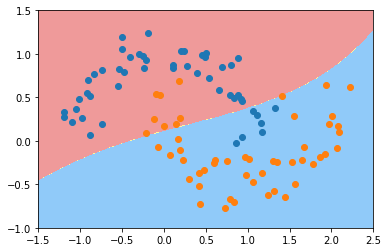

In [60]:
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 欠拟和了

In [61]:
# 无论是RBF核还是高斯核，gamma值相当于在调整模型的复杂度，越小，模型复杂度越小。越高，复杂度越高。

## SVM思想解决回归问题

In [62]:
# 思路：指定一个所谓的margin值，期望在这个margin的范围里，我们包含的样本数据点越多越好，这个时候我们取中间的直线来作为最终的结果。
# 其实，它的思想与我们用SVM解决回归问题相反，回归问题是期望margin范围里面的点越少越好。极端情况下，在hard里，里面的点是一个都没有的

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [65]:
boston = datasets.load_boston()
X = boston.data
y= boston.target

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [77]:
from sklearn.svm import LinearSVR # 这里的R表示regression的意思，利用线性SVM解决回归问题
from sklearn.svm import SVR # SVR里面可以传入不同的核函数进行计算，参数设置和SVC基本一样，就是多了一个epsilon参数
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))  # 还可以传入大C参数，这里使用默认值;这里有很多的超参数可以调节
    ])

In [78]:
# svr = StandardLinearSVR()
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [81]:
svr.score(X_test, y_test)

# 可以通过调节LineaSVR里面的参数，来提高准确度
# 注意不能仅仅看score的值，很可能是过拟合的，可以尝试使用交叉验证的方式得到结果

0.6355931025847797

In [ ]:
# SVM算法求解最优化问题的底层的数学比较复杂，本节没有从底层实现